In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [120]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [27]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [143]:
y = data['median_house_value']
x = data.drop(['median_house_value'], axis=1)
cate_col = [c for c in x.columns if x[c].dtype == 'object']
num_col = [c for c in x.columns if c not in cate_col]

In [144]:
# encode categorical variables

### categorical imputation
# cate_miss = [c for c in cate_col if x_train[c].isnull().any()]
# x[cate_miss].fillna(value='NA', axis=1, inplace=True)

# from sklearn.preprocessing import OneHotEncoder
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
# cate_encode = pd.DataFrame(OH_encoder.fit_transform(x_train[cate_col]))
# cate_encode.columns = OH_encoder.get_feature_names()
# x_train.join(cate_encode)

cate_encode = pd.get_dummies(x[cate_col], drop_first=True)
x = x.join(cate_encode)
x = x.drop(cate_col, axis=1)
x.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000


In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [146]:
# imputation

num_miss = [c for c in num_col if x_train[c].isnull().any()]

### numerical imputation
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
x_train[num_miss] = num_imputer.fit_transform(x_train[num_miss])
x_test[num_miss] = num_imputer.transform(x_test[num_miss])




<ipython-input-146-258a2e21d77c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_miss] = num_imputer.fit_transform(x_train[num_miss])
/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-146-258a2e21d77c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [147]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 3578 to 2439
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   ocean_proximity_INLAND      16512 non-null  uint8  
 9   ocean_proximity_ISLAND      16512 non-null  uint8  
 10  ocean_proximity_NEAR BAY    16512 non-null  uint8  
 11  ocean_proximity_NEAR OCEAN  16512 non-null  uint8  
dtypes: float64(8), uint8(4)
memory usage: 1.2 MB


In [124]:
# # encode categorical variables

# from sklearn.preprocessing import OneHotEncoder

# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
# cate_encode = pd.DataFrame(OH_encoder.fit_transform(x_train[cate_col]))
# cate_encode.columns = OH_encoder.get_feature_names()
# x_train.join(cate_encode)

# cate_encode_train = pd.get_dummies(x_train[cate_col], drop_first=True)
# x_train = x_train.join(cate_encode_train)
# x_train = x_train.drop(cate_col, axis=1)
# cate_encode_test = pd.get_dummies(x_test[cate_col], drop_first=True)
# x_test = x_test.join(cate_encode_test)
# x_test = x_test.drop(cate_col, axis=1)
# x_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.594973,35.663212,28.346899,2619.336725,529.261628,1410.363857,494.708576,3.920924,0.320252,0.109738,0.137112
std,2.027206,2.160073,12.442095,2039.750593,396.045104,1162.630814,368.175668,1.998407,0.466630,0.312601,0.344008
min,-124.300000,32.540000,2.000000,2.000000,1.000000,6.000000,1.000000,0.499900,0.000000,0.000000,0.000000
25%,-121.830000,33.940000,18.000000,1451.750000,298.750000,783.000000,280.000000,2.576775,0.000000,0.000000,0.000000
50%,-118.510000,34.270000,29.000000,2161.000000,435.000000,1170.000000,410.500000,3.526000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3170.250000,640.000000,1704.500000,606.000000,4.761525,1.000000,0.000000,0.000000
max,-114.570000,41.950000,52.000000,25135.000000,4819.000000,35682.000000,4769.000000,15.000100,1.000000,1.000000,1.000000


In [148]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3578,-118.53,34.24,24.0,2718.0,719.0,3018.0,644.0,2.9076,0,0,0,0
11132,-117.93,33.85,25.0,1026.0,288.0,1646.0,283.0,4.2019,0,0,0,0
14862,-117.09,32.65,25.0,3509.0,985.0,2359.0,899.0,2.6296,0,0,0,1
4929,-118.24,33.99,41.0,1425.0,372.0,1803.0,353.0,1.6731,0,0,0,0
7805,-118.09,33.89,42.0,1150.0,215.0,708.0,204.0,3.6875,0,0,0,0


In [149]:
# remove outliers
# x_train0 = x_train.copy()
# log_columns = ['households', 'population', 'total_rooms', 'total_bedrooms', 'median_income']
# x_train0[num_col] = x_train0[num_col].apply(np.log)
z_scores = scipy.stats.zscore(x_train[num_col])
filtered_data = (np.abs(z_scores)<5).all(axis=1)
x_train = x_train[filtered_data]
y_train = y_train[filtered_data]
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,16319.000000,16319.000000,16319.00000,16319.000000,16319.000000,16319.000000,16319.000000,16319.000000,16319.000000,16319.000000,16319.000000,16319.000000
mean,-119.570381,35.631931,28.83461,2520.596483,517.679453,1373.769778,481.943134,3.815153,0.316931,0.000306,0.111588,0.126969
std,1.998232,2.132544,12.53466,1719.541521,344.895172,905.445696,314.726698,1.772994,0.465295,0.017502,0.314868,0.332948
min,-124.350000,32.550000,1.00000,6.000000,2.000000,3.000000,2.000000,0.499900,0.000000,0.000000,0.000000,0.000000
25%,-121.790000,33.930000,18.00000,1442.000000,296.000000,785.500000,279.000000,2.555050,0.000000,0.000000,0.000000,0.000000
50%,-118.500000,34.260000,29.00000,2106.000000,435.000000,1160.000000,408.000000,3.524200,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.00000,3104.500000,637.000000,1710.500000,597.000000,4.711900,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.880000,52.00000,13703.000000,2634.000000,7014.000000,2428.000000,13.173800,1.000000,1.000000,1.000000,1.000000


In [150]:
# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])
x_train.describe(include='all')

<ipython-input-150-b109cf9f065a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[num_col] = scaler.transform(x_test[num_col])
/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,1.631900e+04,1.631900e+04,1.631900e+04,1.631900e+04,1.631900e+04,1.631900e+04,1.631900e+04,1.631900e+04,16319.000000,16319.000000,16319.000000,16319.000000
mean,-4.151594e-15,1.000640e-15,-6.967893e-17,-1.512516e-16,-5.953187e-17,3.584890e-17,9.256507e-17,2.047575e-16,0.316931,0.000306,0.111588,0.126969
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,0.465295,0.017502,0.314868,0.332948
min,-2.391997e+00,-1.445234e+00,-2.220680e+00,-1.462409e+00,-1.495223e+00,-1.513964e+00,-1.524999e+00,-1.869918e+00,0.000000,0.000000,0.000000,0.000000
25%,-1.110825e+00,-7.980997e-01,-8.643986e-01,-6.272774e-01,-6.427641e-01,-6.497218e-01,-6.448431e-01,-7.107422e-01,0.000000,0.000000,0.000000,0.000000
50%,5.356805e-01,-6.433502e-01,1.319502e-02,-2.411161e-01,-2.397308e-01,-2.361007e-01,-2.349511e-01,-1.641079e-01,0.000000,0.000000,0.000000,0.000000
75%,7.809048e-01,9.791745e-01,6.514449e-01,3.395797e-01,3.459724e-01,3.719058e-01,3.655883e-01,5.057963e-01,1.000000,0.000000,0.000000,0.000000
max,2.632598e+00,2.929956e+00,1.848163e+00,6.503330e+00,6.136315e+00,6.229422e+00,6.183513e+00,5.278603e+00,1.000000,1.000000,1.000000,1.000000


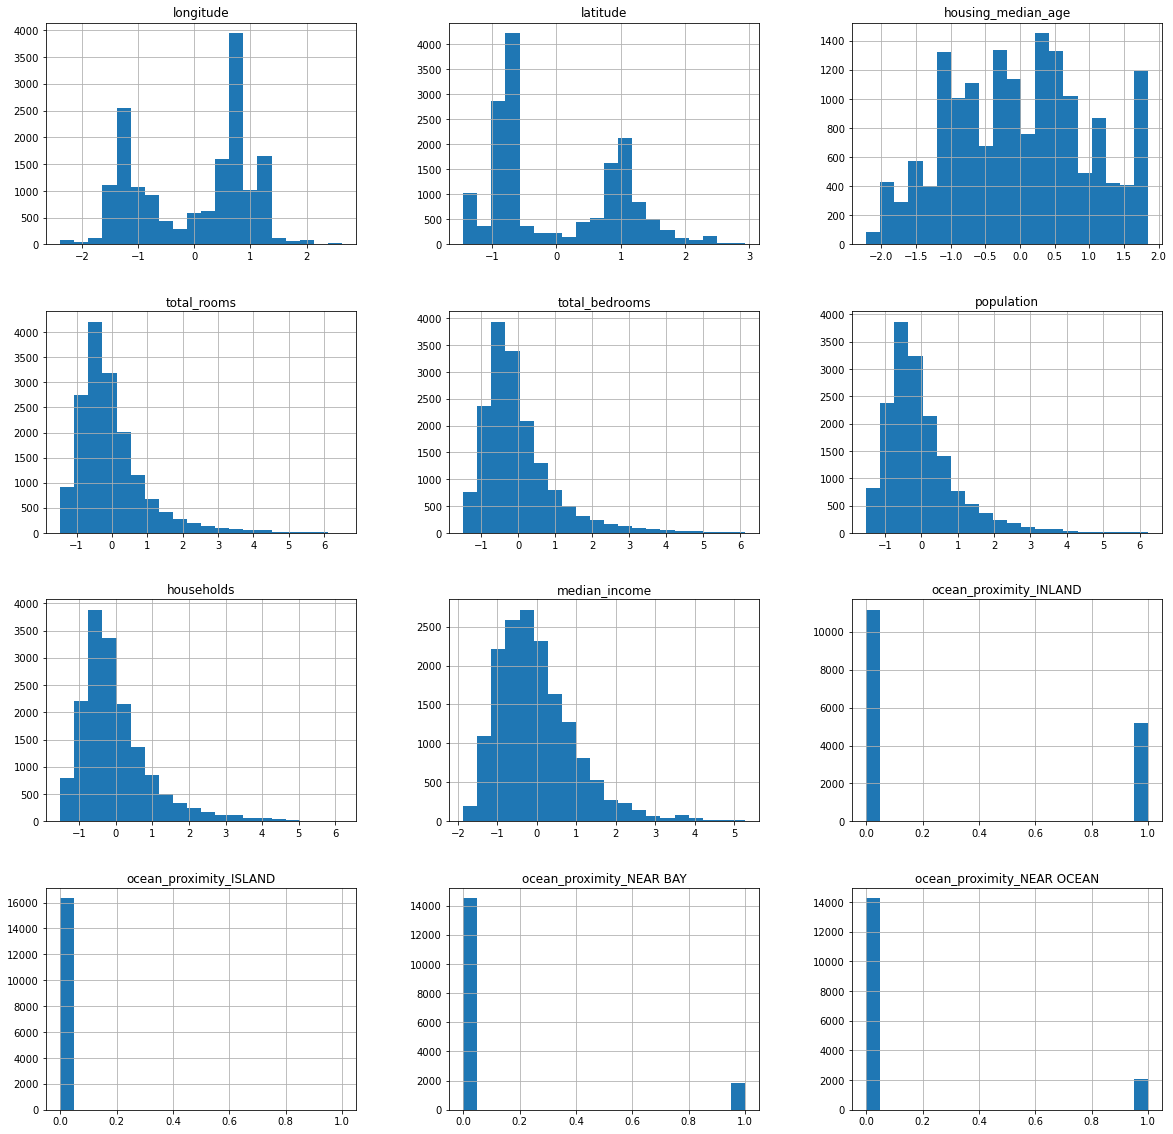

In [151]:
x_train.hist(bins = 20, figsize = (20, 20))
plt.show()

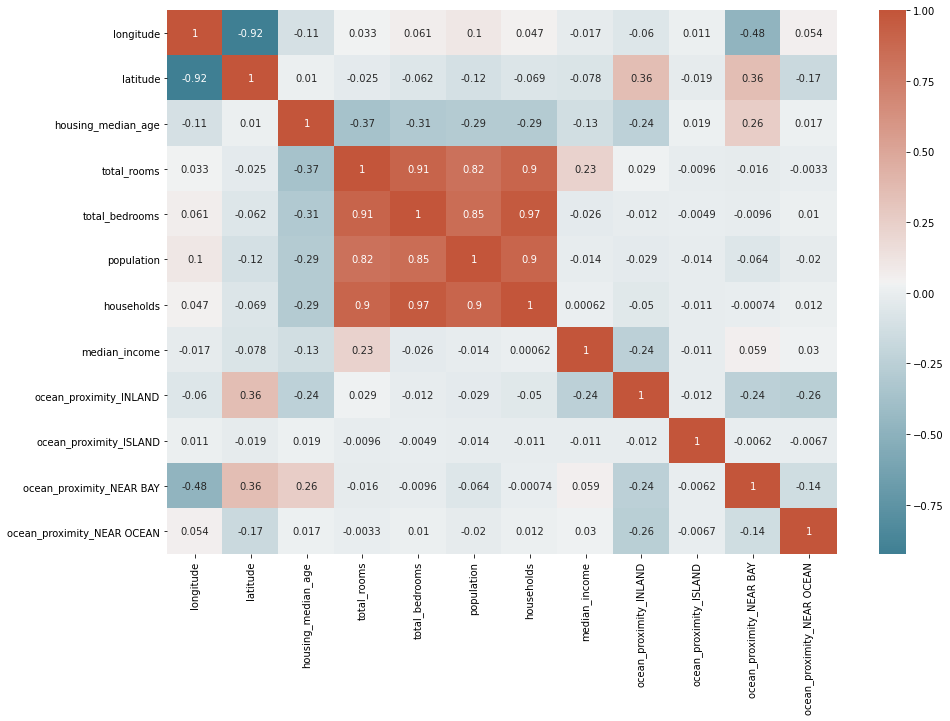

In [152]:
corr = x_train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [153]:
x_ols = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_ols)
sm_ols = ols.fit()
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2534.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:48:11   Log-Likelihood:            -2.0461e+05
No. Observations:               16319   AIC:                         4.093e+05
Df Residuals:                   16306   BIC:                         4.094e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.173e+05    926.711    234.494      0.000    2.15e+05    2.19e+05
longitude                  -5.126e+04   2250.900    -22.771      0.000   -5.57e+04   -4.68e+04
latitude                   -5.202e+04   2373.974    -21.913      0.000   -5.67e+04   -4.74e+04
housing_median_age          1.389e+04    611.759     22.697      0.000    1.27e+04    1.51e+04
total_rooms                -1.833e+04   1744.139    -10.512      0.000   -2.18e+04   -1.49e+04
total_bedrooms              3.732e+04   2515.148     14.839      0.000    3.24e+04    4.23e+04
population                  -4.57e+04   1253.242    -36.467      0.000   -4.82e+04   -4.32e+04
households                  3.147e+04   2638.389     11.928      0.000    2.63e+04    3.66e+04
median_income               7.508e+04    738.987    101.601      0.000    7.36e+04    7.65e+04
ocean_proximity_INLAND     -3.735e+04   1936.612    -19.286      0.000   -4.11e+04   -3.36e+04
ocean_proximity_ISLAND      1.545e+05   3.02e+04      5.111      0.000    9.53e+04    2.14e+05
ocean_proximity_NEAR BAY   -5708.7780   2108.142     -2.708      0.007   -9840.967   -1576.589
ocean_proximity_NEAR OCEAN  4688.4212   1736.463      2.700      0.007    1284.763    8092.080
==============================================================================
Omnibus:                     3884.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12348.107
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       6.507   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs = pd.Series([variance_inflation_factor(x_ols.values, i) 
               for i in range(1, x_ols.shape[1])], 
              index=x_ols.columns[1:]).sort_values(ascending=False)
VIFs

households                    24.931871
total_bedrooms                22.657095
latitude                      20.185015
longitude                     18.146360
total_rooms                   10.895299
population                     5.625317
ocean_proximity_INLAND         2.907984
median_income                  1.955917
ocean_proximity_NEAR BAY       1.578003
housing_median_age             1.340412
ocean_proximity_NEAR OCEAN     1.197111
ocean_proximity_ISLAND         1.002816
dtype: float64

In [156]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

ridge_cv = RidgeCV(alphas = np.arange(0.1, 10, 0.05), cv = 5)
ridge_cv_res = ridge_cv.fit(x_train, y_train)
print(ridge_cv_res.alpha_)
pred_train_ridge= ridge_cv_res.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
pred_test_ridge= ridge_cv_res.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_ridge)))

1.3000000000000005
67476.11253739029
70116.43827105315


In [157]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

lasso_cv = LassoCV(alphas = np.arange(0.1, 10, 0.05), cv = 5)
lasso_cv_res = lasso_cv.fit(x_train, y_train)
print(lasso_cv_res.alpha_)
pred_train_lasso= lasso_cv_res.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
pred_test_lasso= lasso_cv_res.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

8.250000000000002
67475.49334540185
70107.52385703266


67473.79748366431
70120.53276604807


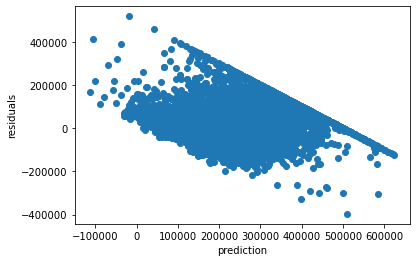

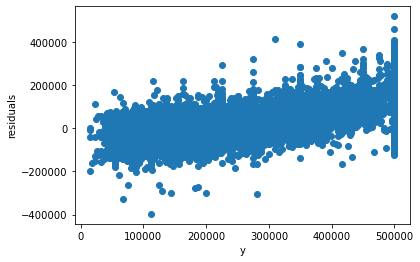

In [160]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_res = lr.fit(x_train, y_train)
pred_train_lr= lr_res.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
pred_test_lr= lr_res.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
residuals = y_train - pred_train_lr
plt.scatter(pred_train_lr, residuals)
plt.xlabel('prediction')
plt.ylabel('residuals')
plt.show()
plt.scatter(y_train, residuals)
plt.xlabel('y')
plt.ylabel('residuals')
plt.show()

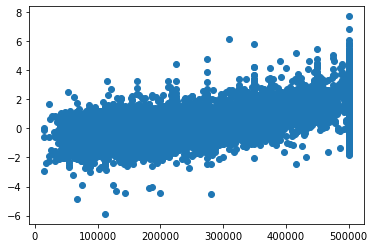

In [161]:
#create instance of influence
influence = sm_ols.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal
plt.scatter(y_train, standardized_residuals)
plt.show()

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 9, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [200, 300, 400]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=0, random_state=33, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)
pred_rf_random_train = rf_random.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_rf_random_train)))
pred_rf_random_test = rf_random.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_rf_random_test)))

58523.489301957095
58858.39558159149


In [164]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [20, 50, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 7, 9]
# Minimum number of samples required to split a node
min_samples_split = [200, 300, 400]

# Create the grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=0, n_jobs = -1, 
                       scoring='neg_mean_squared_error')
# Fit the grid search model
rf_grid.fit(x_train, y_train)
pred_rf_grid_train = rf_grid.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_rf_grid_train)))
pred_rf_grid_test = rf_grid.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_rf_grid_test)))

58619.90706064471
58886.868528151856


Text(0.5, 0, 'Feature Importance Score')

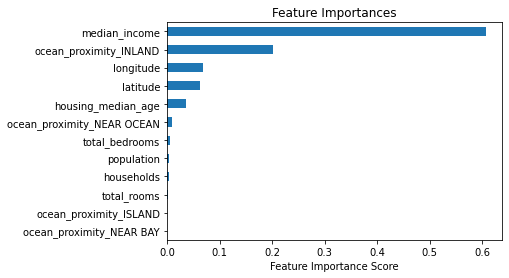

In [193]:
feat_imp = pd.Series(rf_grid.best_estimator_.feature_importances_, list(x_train.columns)).sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')

Text(0, 0.5, 'Feature Importance Score')

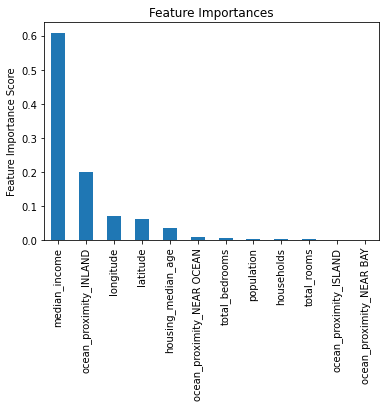

In [166]:
feat_imp = pd.Series(rf_random.best_estimator_.feature_importances_, list(x_train.columns)).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [177]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=300, min_samples_leaf=100,max_depth=8,
                                max_features='auto',subsample=0.8,random_state=33)
param_test1 = {'n_estimators':range(20,301,20)}
gs_gbr1 = GridSearchCV(estimator = gbr, param_grid = param_test1, cv = 5, verbose=0, n_jobs = -1, 
                       scoring='neg_mean_squared_error')
gs_gbr1.fit(x_train, y_train)
print(gs_gbr1.best_params_)
# print(gs_gbr1.cv_results_)

{'n_estimators': 300}


In [170]:
pred_gs_gbr1_train = gs_gbr1.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_gs_gbr1_train)))
pred_gs_gbr1_test = gs_gbr1.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_gs_gbr1_test)))

42044.47213224106
45904.58901897823


In [188]:
gs_gbr1.cv_results_

{'mean_fit_time': array([ 1.1302259 ,  2.32804394,  3.40627546,  4.69453063,  5.93418584,
         6.86151991,  7.92363534,  9.04259658, 10.18794575, 11.49960084,
        12.48755512, 13.7046782 , 14.82730365, 16.16954188, 16.07430539]),
 'std_fit_time': array([0.0152803 , 0.03222307, 0.05354034, 0.09385233, 0.15995867,
        0.08142191, 0.06962523, 0.0359589 , 0.08846661, 0.0733026 ,
        0.0417673 , 0.08031985, 0.16954977, 0.10366303, 1.33694174]),
 'mean_score_time': array([0.00723977, 0.0128202 , 0.01511216, 0.01562047, 0.02035999,
        0.02334976, 0.02698584, 0.02506905, 0.02811866, 0.02969294,
        0.03188796, 0.03419456, 0.03759141, 0.04073939, 0.03709097]),
 'std_score_time': array([0.00090434, 0.00429527, 0.00460392, 0.00053423, 0.00216   ,
        0.00314826, 0.0070123 , 0.00052808, 0.00148684, 0.00194057,
        0.00117606, 0.000931  , 0.00159649, 0.00256427, 0.00344917]),
 'param_n_estimators': masked_array(data=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220

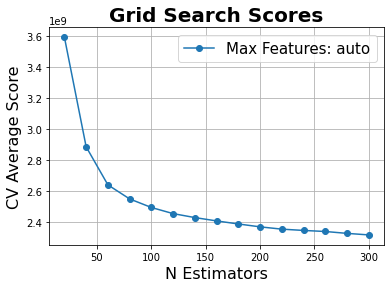

In [178]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = -np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
n_estimators = list(range(20,301,20))
max_features = ['auto']
plot_grid_search(gs_gbr1.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')


In [186]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators = 200,
                                max_features='auto',subsample=0.8,random_state=33)
param_test2 = {'max_depth': [9], 'min_samples_split':range(100,601,200), 'min_samples_leaf':range(50,101,20)}
gs_gbr2 = GridSearchCV(estimator = gbr, param_grid = param_test2, cv = 5, verbose=0, n_jobs = -1, 
                       scoring='neg_mean_squared_error')
gs_gbr2.fit(x_train, y_train)
print(gs_gbr2.best_params_)
# print(gs_gbr1.cv_results_)

{'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [180]:
pred_gs_gbr2_train = gs_gbr2.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_gs_gbr2_train)))
pred_gs_gbr2_test = gs_gbr2.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_gs_gbr2_test)))

35598.74785814411
44193.537920089555


In [183]:
gs_gbr2.cv_results_['mean_test_score'].shape

(27,)

In [187]:
gs_gbr2.cv_results_

{'mean_fit_time': array([13.9359694 , 13.15013804, 14.05908489, 15.32045107, 14.03833733,
        13.99358816, 14.3125104 , 14.33713813, 12.22824092]),
 'std_fit_time': array([0.37056255, 0.5499985 , 0.71746821, 0.06773107, 0.04945874,
        0.28345652, 0.26230502, 0.30132552, 1.88408195]),
 'mean_score_time': array([0.03373322, 0.03030958, 0.03372979, 0.03674159, 0.03133054,
        0.03304982, 0.03785076, 0.03627887, 0.02892761]),
 'std_score_time': array([0.00146123, 0.00132601, 0.0041481 , 0.00342001, 0.0023973 ,
        0.00364817, 0.00535489, 0.00198527, 0.00477056]),
 'param_max_depth': masked_array(data=[9, 9, 9, 9, 9, 9, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[50, 50, 50, 70, 70, 70, 90, 90, 90],
              mask=[False, False, False, False, False, False, False, False,
                    False],
       

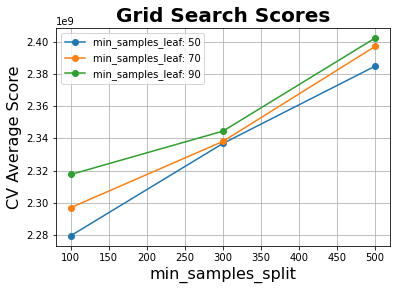

In [191]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = -np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=10)
    ax.grid('on')

# Calling Method 
min_samples_split = list(range(100,601,200))
min_samples_leaf = list(range(50,101,20))
plot_grid_search(gs_gbr2.cv_results_, min_samples_split, min_samples_leaf, 'min_samples_split', 'min_samples_leaf' )


In [ ]:
feat_imp_gbr = pd.Series(gs_gbr2.best_estimator_.feature_importances_, list(x_train.columns)).sort_values(ascending=False)
feat_imp_gbr.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
gbr = GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=50, n_estimators = 200, max_depth = 9, 
                                min_samples_split = 100, 
                                max_features='sqrt',subsample=0.8,random_state=33)
gbr.fit(x_train, y_train)
pred_gbr_train = gbr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_gbr_train)))
pred_gbr_test = gbr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_gbr_test)))

In [6]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
ocean_index = list(data['ocean_proximity'].value_counts().index[:2])
ocean_index

['<1H OCEAN', 'INLAND']

In [16]:
data0 = data[data['ocean_proximity'].isin(ocean_index)]
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

,0,1,2,3
0,0,0,1,1
